# MUSIC GENERATION 
## PART I

In [1]:
# importing libraries for midi file handling
from music21 import *

In [2]:
%matplotlib inline

In [3]:
#importing libararies for visualization, maths and file handling
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [4]:
#function to convert midi file into an array of notes and chords
def read_midi(file):
    
    print("Loading Music File:",file)
    
    notes=[]
    
    #parsing a midi file
    midi = converter.parse(file)
  
    #grouping based on different instruments
    s2 = instrument.partitionByInstrument(midi)
    
    #select elements of only piano
    notes_to_parse = s2.parts[0].recurse()
    
    #finding whether a particular element is note or a chord
    for element in notes_to_parse:
                
        #note
        if isinstance(element, note.Note):
            notes.append(str(element.pitch))
                
        #chord
        elif isinstance(element, chord.Chord):
            notes.append('.'.join(str(n) for n in element.normalOrder))

    return np.array(notes)

In [5]:
#defining a path to midi files
path='2004/'

In [6]:
#read all the filenames
files=[i for i in os.listdir(path) if i.endswith(".midi")]

In [7]:
#reading each midi file
notes_array = np.array([read_midi(path+i) for i in files])

Loading Music File: 2004/MIDI-Unprocessed_SMF_02_R1_2004_01-05_ORIG_MID--AUDIO_02_R1_2004_05_Track05_wav.midi
Loading Music File: 2004/MIDI-Unprocessed_SMF_02_R1_2004_01-05_ORIG_MID--AUDIO_02_R1_2004_06_Track06_wav.midi
Loading Music File: 2004/MIDI-Unprocessed_SMF_02_R1_2004_01-05_ORIG_MID--AUDIO_02_R1_2004_08_Track08_wav.midi
Loading Music File: 2004/MIDI-Unprocessed_SMF_02_R1_2004_01-05_ORIG_MID--AUDIO_02_R1_2004_10_Track10_wav.midi
Loading Music File: 2004/MIDI-Unprocessed_SMF_05_R1_2004_01_ORIG_MID--AUDIO_05_R1_2004_02_Track02_wav.midi
Loading Music File: 2004/MIDI-Unprocessed_SMF_05_R1_2004_01_ORIG_MID--AUDIO_05_R1_2004_03_Track03_wav.midi
Loading Music File: 2004/MIDI-Unprocessed_SMF_05_R1_2004_02-03_ORIG_MID--AUDIO_05_R1_2004_06_Track06_wav.midi
Loading Music File: 2004/MIDI-Unprocessed_SMF_07_R1_2004_01_ORIG_MID--AUDIO_07_R1_2004_02_Track02_wav.midi
Loading Music File: 2004/MIDI-Unprocessed_SMF_07_R1_2004_01_ORIG_MID--AUDIO_07_R1_2004_04_Track04_wav.midi
Loading Music File: 20

Loading Music File: 2004/MIDI-Unprocessed_XP_09_R1_2004_05_ORIG_MID--AUDIO_09_R1_2004_08_Track08_wav.midi
Loading Music File: 2004/MIDI-Unprocessed_XP_10_R1_2004_01-02_ORIG_MID--AUDIO_10_R1_2004_01_Track01_wav.midi
Loading Music File: 2004/MIDI-Unprocessed_XP_10_R1_2004_01-02_ORIG_MID--AUDIO_10_R1_2004_02_Track02_wav.midi
Loading Music File: 2004/MIDI-Unprocessed_XP_10_R1_2004_03-04_ORIG_MID--AUDIO_10_R1_2004_03_Track03_wav.midi
Loading Music File: 2004/MIDI-Unprocessed_XP_10_R1_2004_05_ORIG_MID--AUDIO_10_R1_2004_05_Track05_wav.midi
Loading Music File: 2004/MIDI-Unprocessed_XP_11_R1_2004_01-02_ORIG_MID--AUDIO_11_R1_2004_01_Track01_wav.midi
Loading Music File: 2004/MIDI-Unprocessed_XP_11_R1_2004_01-02_ORIG_MID--AUDIO_11_R1_2004_02_Track02_wav.midi
Loading Music File: 2004/MIDI-Unprocessed_XP_11_R1_2004_03-04_ORIG_MID--AUDIO_11_R1_2004_03_Track03_wav.midi
Loading Music File: 2004/MIDI-Unprocessed_XP_11_R1_2004_03-04_ORIG_MID--AUDIO_11_R1_2004_04_Track04_wav.midi
Loading Music File: 2004/

In [8]:
#converting 2D array into 1D array
notes_ = [element for note_ in notes_array for element in note_]

In [9]:
#No. of unique notes
unique_notes = list(set(notes_))
print(len(unique_notes))

999


In [10]:
from collections import Counter

In [11]:
# frequency of notes and chords in the array
freq = dict(Counter(notes_))

In [12]:
#consider only the frequencies
no=[count for _,count in freq.items()]

(array([900.,  49.,   8.,   7.,   4.,   6.,   8.,   7.,   8.,   2.]),
 array([1.00000e+00, 1.48680e+03, 2.97260e+03, 4.45840e+03, 5.94420e+03,
        7.43000e+03, 8.91580e+03, 1.04016e+04, 1.18874e+04, 1.33732e+04,
        1.48590e+04]),
 <a list of 10 Patch objects>)

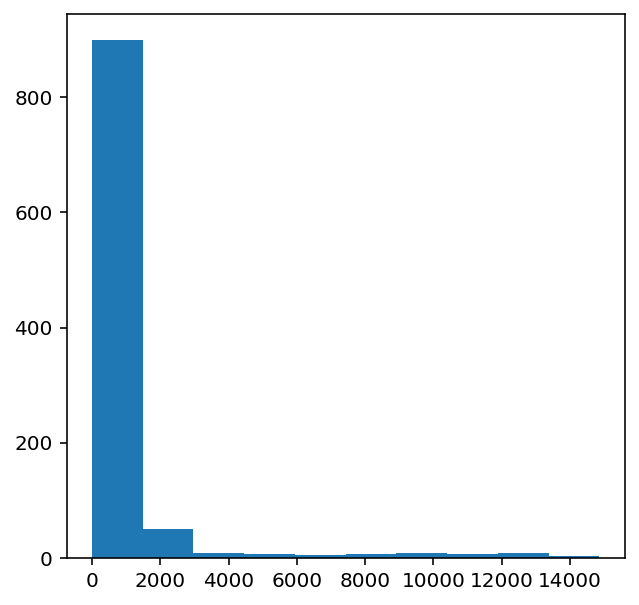

In [13]:
#set the figure size
plt.figure(figsize=(5,5))

#plot
plt.hist(no)

In [14]:
#storing notes that have high frequency
frequent_notes = [note_ for note_, count in freq.items() if count>=2600]
print(len(frequent_notes))

59


In [15]:
#Storing notes which don't act as ouliers
new = [note for note in notes_ if note in frequent_notes]

In [16]:
#No. of unique notes
unique_notes = list(set(new))
print(len(unique_notes))

59


In [17]:
n_vocab = len(unique_notes)

In [18]:
# Maping int to notes
notes_integer = dict((note_, number) for number, note_ in enumerate(unique_notes))

In [19]:
integer_as_note = []
for note in new:
    integer_as_note.append(notes_integer[note])

In [20]:
X = np.array(integer_as_note)

In [21]:
X = X.reshape(-1,1)

In [22]:
X.shape

(446197, 1)

In [23]:
X_train = []
y_train = []
for i in range(100, len(X)):
    X_train.append(X[i-100:i,0])
    y_train.append(X[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [24]:
X_train = np.reshape(X_train,  (X_train.shape[0], X_train.shape[1], 1))

In [25]:
network_input = X_train / float(n_vocab)

In [27]:
import pickle 

In [28]:
with open("network_input.pkl", "wb") as f:
    pickle.dump(network_input, f)

In [29]:
from keras.utils import to_categorical

In [30]:
network_output = to_categorical(y_train)

In [31]:
network_output.shape

(446097, 59)

In [32]:
int_to_note = dict((number, note_) for number, note_ in enumerate(unique_notes))

In [33]:
with open("int_to_note.pkl", "wb") as t:
    pickle.dump(int_to_note, t)

### Model Architecture and Training

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Activation
from keras.callbacks import ModelCheckpoint

In [35]:
checkpoint = ModelCheckpoint("Model_Weights.hdf5", monitor='loss', verbose=1,
    save_best_only=True, mode='min', period=1)

In [36]:
callbacks_list = [checkpoint]

In [37]:
model = Sequential()

In [38]:
model.add(LSTM( 500, input_shape=(network_input.shape[1], network_input.shape[2]), return_sequences=True))
model.add(Dropout(0.2))

In [39]:
model.add(LSTM(500, return_sequences=True))
model.add(Dropout(0.2))

In [40]:
model.add(Dense(500))

In [41]:
model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.2))

In [42]:
model.add(LSTM(256))
model.add(Dense(256))
model.add(Dropout(0.2))

In [43]:
model.add(Dense(n_vocab))

In [44]:
model.add(Activation('softmax'))

In [45]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(network_input, network_output, epochs=30, batch_size=32,callbacks=callbacks_list)